In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Loaded Images
Sample Image


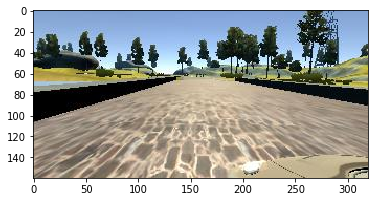

In [2]:
%matplotlib inline

lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for line in reader:        
        lines.append(line)

images = []
measurements = []

for line in lines:    
    
    source_path_left = line['left']
    source_path_center = line['center']
    source_path_right = line['right']
    
    filename_left = source_path_left.split('/')[-1]
    filename_center = source_path_center.split('/')[-1]
    filename_right = source_path_right.split('/')[-1]
    
    current_path_left = './data/IMG/' + filename_left
    current_path_center = './data/IMG/' + filename_center
    current_path_right = './data/IMG/' + filename_right
    
    image_left = cv2.cvtColor(cv2.imread(current_path_left), cv2.COLOR_BGR2RGB)
    image_center = cv2.cvtColor(cv2.imread(current_path_center),cv2.COLOR_BGR2RGB)
    image_right = cv2.cvtColor(cv2.imread(current_path_right),cv2.COLOR_BGR2RGB)    
    
    images.append(image_left)
    images.append(image_center)
    images.append(image_right)    
    
    measurement_center = float(line['steering'])
    
    if(measurement_center != 0.0):  
        images.append(np.fliplr(image_left))
        images.append(np.fliplr(image_center))
        images.append(np.fliplr(image_right))
    
    correction = 0.2
    
    measurement_left = measurement_center + correction
    measurement_right = measurement_center - correction    
    
    measurements.append(measurement_left)    
    measurements.append(measurement_center)
    measurements.append(measurement_right)  
    
    if(measurement_center != 0.0):     
        measurements.append(measurement_left * -1.0)
        measurements.append(measurement_center * -1.0)
        measurements.append(measurement_right * -1.0)

X_train = np.array(images)
y_train = np.array(measurements)
print("Loaded Images")
print("Sample Image")
imgplot = plt.imshow(X_train[0])


In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense,Lambda, Dropout, Activation, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [7]:
model = Sequential()

#Preproccessing
model.add(Lambda(lambda x:x/255.0 - 0.5 ,input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25), (0,0))))


#Convolution Layer 1
model.add(Convolution2D(3,5,5,subsample=(2,2)))

#Convolution Layer 2
model.add(Convolution2D(24,5,5,subsample=(2,2)))

#Convolution Layer 3
model.add(Convolution2D(36,5,5,subsample=(2,2)))


#Convolution Layer 4
model.add(Convolution2D(48,3,3,activation="relu"))


#Convolution Layer 5
model.add(Convolution2D(64,3,3,activation="relu"))


#Fully Connected Layer 1
model.add(Flatten())
model.add(Dense(1164))
model.add(Dropout(0.4))

#Fully Connected Layer 2
model.add(Dense(100))
model.add(Dropout(0.3))

#Fully Connected Layer 3
model.add(Dense(50))

#Fully Connected Layer 4
model.add(Dense(10))
model.add(Activation('relu'))


#Output
model.add(Dense(1))


model.compile('adam', 'mean_squared_error',['accuracy'])
model.fit(X_train,y_train, validation_split=0.2, shuffle=True, nb_epoch=3)

model.save('model8.h5')

model.summary()

Train on 28106 samples, validate on 7027 samples
Epoch 1/3
28106/28106 [==============================] - 49s - loss: 0.0216 - acc: 0.1233 - val_loss: 0.0192 - val_acc: 0.1274
Epoch 2/3
28106/28106 [==============================] - 49s - loss: 0.0184 - acc: 0.1233 - val_loss: 0.0210 - val_acc: 0.1274
Epoch 3/3
28106/28106 [==============================] - 49s - loss: 0.0207 - acc: 0.1232 - val_loss: 0.0214 - val_acc: 0.1274
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_4 (Lambda)                (None, 160, 320, 3)   0           lambda_input_4[0][0]             
____________________________________________________________________________________________________
cropping2d_4 (Cropping2D)        (None, 65, 320, 3)    0           lambda_4[0][0]                   
_________________________________________________________________